In [65]:
import json
import requests
import pandas as pd
from pprint import pprint 
from pandas import json_normalize
from config import gkey
import random
from csv import writer
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Reading into CSV file and adding all coord data into a list
data = 'NYC_2019.csv'
data_df = pd.read_csv(data)
data_df.head()
latlng = data_df[['latitude', 'longitude']]
latlng_list = latlng.values.tolist()
latlng_list
airbnb_data = data_df[['latitude','longitude','price']]
#Convert lat and lng values into strings so google's api understands the given data when used to make requests
coord = airbnb_data['latitude'].astype(str) + ", " + airbnb_data['longitude'].astype(str)
coord

0        40.64749, -73.97237
1        40.75362, -73.98377
2         40.80902, -73.9419
3        40.68514, -73.95976
4        40.79851, -73.94399
                ...         
48890    40.67853, -73.94995
48891    40.70184, -73.93317
48892    40.81475, -73.94867
48893    40.75751, -73.99112
48894    40.76404, -73.98933
Length: 48895, dtype: object

In [28]:
#Set url used to place requests to the google maps api
places_url = f'https://maps.googleapis.com/maps/api/place/nearbysearch/json?&key={gkey}'
sample_coords = coord.sample(n=5)
sample_coords = sample_coords.tolist()
#Make sure sample_coords index is equal to the coordinates listed
print(sample_coords)

['40.68227, -73.93305', '40.71728, -74.01511', '40.64386, -73.98195', '40.67127, -73.99006', '40.82931, -73.94358']


In [80]:
#Forming empty list to store rating and price level information
avg_rating = []
avg_price_level = []
food_names = []

#Creating a for loop thst takes the coordinates from the list created earlier and create the query url and save the values returned...
for x in range(len(sample_coords)):
    params = {
        "location": sample_coords[4],
        "radius": 2500,
        "keyword": "food",
    }
    local_content = requests.get(places_url, params=params).json()
    local_content
    json_data = json_normalize(local_content['results'][0:20])
    df_one = pd.DataFrame(json_data, columns= ['rating', 'price_level', 'name'])
    avg_rating = df_one.values.tolist()
    food_names.append(json_data[['name']])
#Sets parameters to only display rows with price levels > or equal to 2 or more and print it out in the dataframe!
    df_one = df_one.loc[df_one["price_level"]>=2]
    df_one['Corresponding Airbnb Coords'] = params['location']
#Using the to_csv function to create seperate csv files to later conjoin to read the data easily
    df_one.to_csv('data5.csv', index=False)

In [81]:
#Takes the csv data from the seperate files and stitches them together
coord_pricing_df = pd.concat(
    map(pd.read_csv, ['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv', 'data5.csv']), ignore_index=True)

#Display dataframe to analyze ratings and price levels 
coord_pricing_df.head(30)

,rating,price_level,name,Corresponding Airbnb Coords
0,4.7,2.0,BKLYN Blend,"40.68227, -73.93305"
1,4.1,2.0,Xcellent Soul Food,"40.68227, -73.93305"
2,3.8,2.0,Soulful Foods,"40.68227, -73.93305"
3,4.3,2.0,Napoleon’s,"40.68227, -73.93305"
4,4.1,2.0,Soulfood Caterers,"40.68227, -73.93305"
5,4.7,2.0,Rector Street Food Enterprises,"40.71728, -74.01511"
6,3.9,2.0,Essen Fast Slow Food,"40.71728, -74.01511"
7,4.6,2.0,Quantum Leap,"40.71728, -74.01511"
8,4.3,2.0,sweetgreen,"40.71728, -74.01511"
9,4.7,2.0,Bite Food & Coffee Co,"40.71728, -74.01511"


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

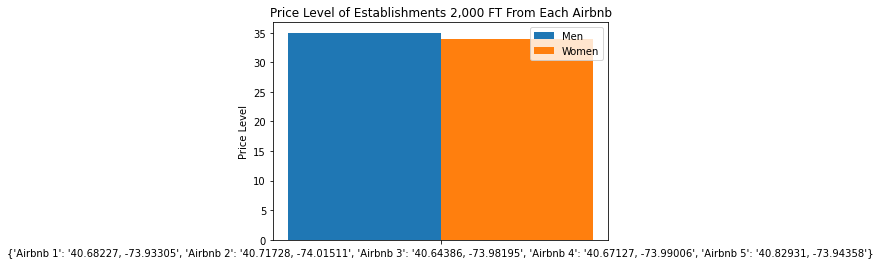

In [76]:
#Bar graph plotting the price levels of the top 5 food places near the coordinates of the chosen airbnb
labels = [{
    'Airbnb 1': coord_pricing_df['Corresponding Airbnb Coords'][0],
    'Airbnb 2': coord_pricing_df['Corresponding Airbnb Coords'][5],
    'Airbnb 3': coord_pricing_df['Corresponding Airbnb Coords'][11],
    'Airbnb 4': coord_pricing_df['Corresponding Airbnb Coords'][15],
    'Airbnb 5': coord_pricing_df['Corresponding Airbnb Coords'][26],
}]
#Insert Data here that needs to be plotted:
'''HERE'''

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Price Level')
ax.set_title('Price Level of Establishments 2,000 FT From Each Airbnb')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [34]:
#c.to_csv(r'data/business_names.csv', index = False) ---> TO PRINT INFORMATION TO EXTERNAL CSV
